In [1]:
import pandas as pd
import numpy as np
from scipy import stats

df=pd.read_excel('附件一.xlsx')
df2=pd.read_excel('附件三（测试集）.xlsx',)


In [2]:
df.head()

,Unnamed: 0,磁芯材料,温度,频率,磁芯损耗,励磁波形,B_max,磁通密度0,1,2,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,NaN,1,25,50030,1997.955250,1,0.028849,0.000213,0.000389,0.000566,...,-0.001551,-0.001374,-0.001198,-0.001022,-0.000846,-0.000669,-0.000492,-0.000316,-0.000140,0.000036
1,NaN,1,25,50020,2427.749830,1,0.031419,-0.000551,-0.000358,-0.000165,...,-0.002476,-0.002284,-0.002091,-0.001899,-0.001707,-0.001515,-0.001322,-0.001129,-0.000937,-0.000744
2,NaN,1,25,50020,3332.725760,1,0.035535,-0.003780,-0.003564,-0.003349,...,-0.005927,-0.005713,-0.005499,-0.005285,-0.005070,-0.004855,-0.004640,-0.004425,-0.004210,-0.003995
3,NaN,1,25,50020,4502.908007,1,0.040015,-0.000511,-0.000267,-0.000023,...,-0.002950,-0.002707,-0.002463,-0.002220,-0.001976,-0.001732,-0.001488,-0.001244,-0.001000,-0.000756
4,NaN,1,25,50030,6063.023248,1,0.045028,0.000458,0.000732,0.001007,...,-0.002290,-0.002016,-0.001741,-0.001466,-0.001192,-0.000917,-0.000642,-0.000367,-0.000092,0.000183


In [3]:
df2.head()

,序号,温度，oC,频率，Hz,磁芯材料,励磁波形,0（磁通密度B，T）,1,2,3,4,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,1,25,56320,材料1,正弦波,0.002216,0.002597,0.002977,0.003358,0.003739,...,-0.001596,-0.001214,-0.000833,-0.000452,-0.000072,0.000308,0.000689,0.001070,0.001452,0.001834
1,2,25,79460,材料1,正弦波,-0.000436,-0.000051,0.000333,0.000716,0.001099,...,-0.004269,-0.003886,-0.003503,-0.003118,-0.002734,-0.002352,-0.001969,-0.001586,-0.001203,-0.000820
2,3,25,89080,材料1,正弦波,-0.000474,-0.000042,0.000390,0.000822,0.001255,...,-0.004800,-0.004368,-0.003935,-0.003502,-0.003069,-0.002636,-0.002204,-0.001772,-0.001340,-0.000908
3,4,25,99950,材料1,正弦波,0.001098,0.001482,0.001866,0.002249,0.002633,...,-0.002742,-0.002359,-0.001975,-0.001591,-0.001207,-0.000823,-0.000438,-0.000054,0.000329,0.000713
4,5,25,99950,材料1,正弦波,-0.002549,-0.002062,-0.001576,-0.001090,-0.000603,...,-0.007403,-0.006918,-0.006432,-0.005947,-0.005462,-0.004976,-0.004491,-0.004006,-0.003521,-0.003035


In [34]:
import pandas as pd
import numpy as np
import xgboost as xgb
#import tensorflow as tf
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor,\
      VotingRegressor,StackingRegressor,GradientBoostingRegressor,\
        RandomForestClassifier,AdaBoostClassifier,\
            GradientBoostingClassifier
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, recall_score, \
    f1_score, roc_curve, auc, classification_report, roc_auc_score
from sklearn.datasets import make_regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
from math import sqrt
from scipy.fft import fft, fftfreq
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [67]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# 一些基本设置
# 设置支持中文字体（黑体）
plt.rcParams['font.sans-serif']=['SimHei'] # 中文支持
plt.rcParams['axes.unicode_minus']=False
# 设置图片清晰度（200dpi: 200像素每英寸）
matplotlib.rcParams['figure.dpi'] = 200
# 图画面板调整为白色
matplotlib.rcParams['axes.facecolor']='white'
matplotlib.rcParams['savefig.facecolor']='white'

In [7]:
#提取平均值与最大值特征
df['mean'] = df.iloc[:, 7:].abs().mean(axis=1)
df['max'] = df.iloc[:, 7:].abs().max(axis=1)

print(df[['mean','max']].head())

       mean       max
0  0.018360  0.028849
1  0.020001  0.031427
2  0.022588  0.035535
3  0.025423  0.040025
4  0.028618  0.045085


In [8]:
df2['mean'] = df2.iloc[:, 5:].abs().mean(axis=1)
df2['max'] = df2.iloc[:, 5:].abs().max(axis=1)

print(df2[['mean','max']].head())

       mean       max
0  0.039799  0.062771
1  0.039751  0.062587
2  0.044759  0.070509
3  0.039622  0.062310
4  0.050173  0.078981


In [46]:
#训练集归一化 定性变量编码处理
#df_backup = df.copy() 
# 创建 MinMaxScaler 对象并指定范围 [-1, 1]
scaler = MinMaxScaler(feature_range=(0, 1))


# 对第三、四、五列进行归一化
df.iloc[:, 2:5] = scaler.fit_transform(df.iloc[:, 2:5])
#对倒数第二第一列进行归一化
df.iloc[:, -1:] = scaler.fit_transform(df.iloc[:, -1:])
#修改列名
#df.rename(columns={'磁芯材料': '编码材料', '励磁波形': '编码波形'}, inplace=True)
mapping_3 = {1: 0, 2: 0.333, 3: 0.667, 4: 1}
mapping_4 = {1: 0, 2: 0.5, 3:1}

df['编码材料'] = df['磁芯材料'].map(mapping_3)
df['编码波形'] = df['励磁波形'].map(mapping_4)

#df2.rename(columns={'励磁波形': '编码波形', '磁芯材料': '编码材料'}, inplace=True)
# mapping_1 = {'1': 0, '2': 0.333, '3': 0.667,'4':1}
# df['编码材料'] = df['磁芯材料'].map(mapping_1)

# mapping_2 = {'1': 0, '2': 0.5, '3': 1}
# df['编码波形'] = df['励磁波形'].map(mapping_1)
# 输出归一化后的 DataFrame
df

,Unnamed: 0,磁芯材料,温度,频率,磁芯损耗,励磁波形,B_max,磁通密度0,1,2,...,1018,1019,1020,1021,1022,1023,mean,max,编码材料,编码波形
0,NaN,1,0.0,0.000089,0.000438,1,0.028849,0.000213,0.000389,0.000566,...,-0.000846,-0.000669,-0.000492,-0.000316,-0.000140,0.000036,0.018360,0.063266,0.0,0.0
1,NaN,1,0.0,0.000066,0.000556,1,0.031419,-0.000551,-0.000358,-0.000165,...,-0.001707,-0.001515,-0.001322,-0.001129,-0.000937,-0.000744,0.020001,0.071758,0.0,0.0
2,NaN,1,0.0,0.000066,0.000807,1,0.035535,-0.003780,-0.003564,-0.003349,...,-0.005070,-0.004855,-0.004640,-0.004425,-0.004210,-0.003995,0.022588,0.085285,0.0,0.0
3,NaN,1,0.0,0.000066,0.001130,1,0.040015,-0.000511,-0.000267,-0.000023,...,-0.001976,-0.001732,-0.001488,-0.001244,-0.001000,-0.000756,0.025423,0.100074,0.0,0.0
4,NaN,1,0.0,0.000089,0.001562,1,0.045028,0.000458,0.000732,0.001007,...,-0.001192,-0.000917,-0.000642,-0.000367,-0.000092,0.000183,0.028618,0.116738,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,NaN,4,1.0,0.330681,0.005584,3,0.034867,-0.017758,-0.017339,-0.016932,...,-0.019528,-0.019356,-0.019157,-0.018903,-0.018573,-0.018180,0.018619,0.083087,1.0,1.0
12396,NaN,4,1.0,0.330681,0.007215,3,0.038341,-0.019690,-0.019227,-0.018776,...,-0.021706,-0.021513,-0.021285,-0.020987,-0.020605,-0.020159,0.020515,0.094528,1.0,1.0
12397,NaN,4,1.0,0.330681,0.012672,3,0.048877,-0.024998,-0.024411,-0.023838,...,-0.027509,-0.027266,-0.026981,-0.026614,-0.026142,-0.025587,0.026160,0.129226,1.0,1.0
12398,NaN,4,1.0,0.330681,0.016883,3,0.054889,-0.027988,-0.027329,-0.026687,...,-0.030793,-0.030516,-0.030196,-0.029787,-0.029264,-0.028647,0.029363,0.149025,1.0,1.0


In [9]:
#df.rename(columns={'励磁波形': '编码波形', '磁芯材料': '编码材料'}, inplace=True)
df2.rename(columns={'温度，oC': '温度', '频率，Hz': '频率'}, inplace=True)


In [10]:
mapping_3 = {1: 25, 2: 50, 3: 75,4: 100}
mapping_4 = {1: 33, 2: 66,3:100}

# 对第一列（材料）和第六列（波形）进行自定义编码
df['编码材料'] = df['磁芯材料'].map(mapping_3)
df['编码波形'] = df['励磁波形'].map(mapping_4)
df

,Unnamed: 0,磁芯材料,温度,频率,磁芯损耗,励磁波形,B_max,磁通密度0,1,2,...,1018,1019,1020,1021,1022,1023,mean,max,编码材料,编码波形
0,NaN,1,25,50030,1997.955250,1,0.028849,0.000213,0.000389,0.000566,...,-0.000846,-0.000669,-0.000492,-0.000316,-0.000140,0.000036,0.018360,0.028849,25,33
1,NaN,1,25,50020,2427.749830,1,0.031419,-0.000551,-0.000358,-0.000165,...,-0.001707,-0.001515,-0.001322,-0.001129,-0.000937,-0.000744,0.020001,0.031427,25,33
2,NaN,1,25,50020,3332.725760,1,0.035535,-0.003780,-0.003564,-0.003349,...,-0.005070,-0.004855,-0.004640,-0.004425,-0.004210,-0.003995,0.022588,0.035535,25,33
3,NaN,1,25,50020,4502.908007,1,0.040015,-0.000511,-0.000267,-0.000023,...,-0.001976,-0.001732,-0.001488,-0.001244,-0.001000,-0.000756,0.025423,0.040025,25,33
4,NaN,1,25,50030,6063.023248,1,0.045028,0.000458,0.000732,0.001007,...,-0.001192,-0.000917,-0.000642,-0.000367,-0.000092,0.000183,0.028618,0.045085,25,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,NaN,4,90,199190,20604.900210,3,0.034867,-0.017758,-0.017339,-0.016932,...,-0.019528,-0.019356,-0.019157,-0.018903,-0.018573,-0.018180,0.018619,0.034867,100,100
12396,NaN,4,90,199190,26504.284280,3,0.038341,-0.019690,-0.019227,-0.018776,...,-0.021706,-0.021513,-0.021285,-0.020987,-0.020605,-0.020159,0.020515,0.038341,100,100
12397,NaN,4,90,199190,46232.491530,3,0.048877,-0.024998,-0.024411,-0.023838,...,-0.027509,-0.027266,-0.026981,-0.026614,-0.026142,-0.025587,0.026160,0.048877,100,100
12398,NaN,4,90,199190,61458.085900,3,0.054889,-0.027988,-0.027329,-0.026687,...,-0.030793,-0.030516,-0.030196,-0.029787,-0.029264,-0.028647,0.029363,0.054889,100,100


In [11]:
#六个特征
X=df.iloc[:,[2,3,1031,1032,1033,1034]]
Y=df.iloc[:,4]



,温度,频率,mean,max,编码材料,编码波形
0,25,50030,0.018360,0.028849,25,33
1,25,50020,0.020001,0.031427,25,33
2,25,50020,0.022588,0.035535,25,33
3,25,50020,0.025423,0.040025,25,33
4,25,50030,0.028618,0.045085,25,33
...,...,...,...,...,...,...
12395,90,199190,0.018619,0.034867,100,100
12396,90,199190,0.020515,0.038341,100,100
12397,90,199190,0.026160,0.048877,100,100
12398,90,199190,0.029363,0.054889,100,100


In [56]:
#测试集归一化 定性变量编码处理
#df_backup = df.copy() 
# 创建 MinMaxScaler 对象并指定范围 [-1, 1]
scaler = MinMaxScaler(feature_range=(0, 1))

# 自定义映射
mapping_3 = {'材料1': 0, '材料2': 0.333, '材料3': 0.667,'材料4': 1}
mapping_4 = {'正弦波': 0, '三角波': 0.5,'梯形波':1}

# 对第二列（B）和第四列（D）进行自定义编码
df2['编码材料'] = df2['磁芯材料'].map(mapping_3)
df2['编码波形'] = df2['励磁波形'].map(mapping_4)
# 对第三、四、五列进行归一化
df2.iloc[:, 1:3] = scaler.fit_transform(df2.iloc[:, 1:3])
#对倒数第二第一列进行归一化
df2.iloc[:, -3:-1] = scaler.fit_transform(df2.iloc[:, -3:-1])

df2.rename(columns={'温度，oC': '温度', '频率，Hz': '频率'}, inplace=True)

# mapping_1 = {'1': 0, '2': 0.333, '3': 0.667,'4':1}
# df['编码材料'] = df['磁芯材料'].map(mapping_1)

# mapping_2 = {'1': 0, '2': 0.5, '3': 1}
# df['编码波形'] = df['励磁波形'].map(mapping_1)
# 输出归一化后的 DataFrame
df2

,序号,温度,频率,磁芯材料,励磁波形,0（磁通密度B，T）,1,2,3,4,...,1018,1019,1020,1021,1022,1023,mean,max,编码材料,编码波形
0,1,0.0,0.013964,材料1,正弦波,0.002216,0.002597,0.002977,0.003358,0.003739,...,-0.000072,0.000308,0.000689,0.001070,0.001452,0.001834,0.039799,0.177191,0.0,0.0
1,2,0.0,0.065254,材料1,正弦波,-0.000436,-0.000051,0.000333,0.000716,0.001099,...,-0.002734,-0.002352,-0.001969,-0.001586,-0.001203,-0.000820,0.039751,0.176576,0.0,0.0
2,3,0.0,0.086577,材料1,正弦波,-0.000474,-0.000042,0.000390,0.000822,0.001255,...,-0.003069,-0.002636,-0.002204,-0.001772,-0.001340,-0.000908,0.044759,0.203041,0.0,0.0
3,4,0.0,0.110670,材料1,正弦波,0.001098,0.001482,0.001866,0.002249,0.002633,...,-0.001207,-0.000823,-0.000438,-0.000054,0.000329,0.000713,0.039622,0.175651,0.0,0.0
4,5,0.0,0.110670,材料1,正弦波,-0.002549,-0.002062,-0.001576,-0.001090,-0.000603,...,-0.005462,-0.004976,-0.004491,-0.004006,-0.003521,-0.003035,0.050173,0.231347,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,1.0,0.202256,材料4,梯形波,-0.017849,-0.017438,-0.017037,-0.016642,-0.016247,...,-0.019438,-0.019270,-0.019091,-0.018882,-0.018606,-0.018252,0.018459,0.082877,1.0,1.0
396,397,1.0,0.202256,材料4,梯形波,-0.028082,-0.027438,-0.026809,-0.026189,-0.025569,...,-0.030559,-0.030303,-0.030029,-0.029704,-0.029271,-0.028715,0.028853,0.147770,1.0,1.0
397,398,1.0,0.241001,材料4,梯形波,-0.071882,-0.070253,-0.068656,-0.067085,-0.065523,...,-0.078293,-0.077632,-0.076916,-0.076045,-0.074906,-0.073480,0.073733,0.427308,1.0,1.0
398,399,1.0,0.283447,材料4,梯形波,-0.069879,-0.068248,-0.066643,-0.065062,-0.063487,...,-0.076779,-0.076078,-0.075268,-0.074256,-0.072985,-0.071491,0.073448,0.425794,1.0,1.0


In [12]:
#更改列名与映射
mapping_3 = {'材料1': 25, '材料2': 50, '材料3': 75,'材料4': 100}
mapping_4 = {'正弦波': 33, '三角波': 66,'梯形波':100}

# 对第二列（B）和第四列（D）进行自定义编码
df2['编码材料'] = df2['磁芯材料'].map(mapping_3)
df2['编码波形'] = df2['励磁波形'].map(mapping_4)

#df2.rename(columns={'温度，oC': '温度', '频率，Hz': '频率'}, inplace=True)
df2

,序号,温度,频率,磁芯材料,励磁波形,0（磁通密度B，T）,1,2,3,4,...,1018,1019,1020,1021,1022,1023,mean,max,编码材料,编码波形
0,1,25,56320,材料1,正弦波,0.002216,0.002597,0.002977,0.003358,0.003739,...,-0.000072,0.000308,0.000689,0.001070,0.001452,0.001834,0.039799,0.062771,25,33
1,2,25,79460,材料1,正弦波,-0.000436,-0.000051,0.000333,0.000716,0.001099,...,-0.002734,-0.002352,-0.001969,-0.001586,-0.001203,-0.000820,0.039751,0.062587,25,33
2,3,25,89080,材料1,正弦波,-0.000474,-0.000042,0.000390,0.000822,0.001255,...,-0.003069,-0.002636,-0.002204,-0.001772,-0.001340,-0.000908,0.044759,0.070509,25,33
3,4,25,99950,材料1,正弦波,0.001098,0.001482,0.001866,0.002249,0.002633,...,-0.001207,-0.000823,-0.000438,-0.000054,0.000329,0.000713,0.039622,0.062310,25,33
4,5,25,99950,材料1,正弦波,-0.002549,-0.002062,-0.001576,-0.001090,-0.000603,...,-0.005462,-0.004976,-0.004491,-0.004006,-0.003521,-0.003035,0.050173,0.078981,25,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,90,141270,材料4,梯形波,-0.017849,-0.017438,-0.017037,-0.016642,-0.016247,...,-0.019438,-0.019270,-0.019091,-0.018882,-0.018606,-0.018252,0.018459,0.034539,100,100
396,397,90,141270,材料4,梯形波,-0.028082,-0.027438,-0.026809,-0.026189,-0.025569,...,-0.030559,-0.030303,-0.030029,-0.029704,-0.029271,-0.028715,0.028853,0.053964,100,100
397,398,90,158750,材料4,梯形波,-0.071882,-0.070253,-0.068656,-0.067085,-0.065523,...,-0.078293,-0.077632,-0.076916,-0.076045,-0.074906,-0.073480,0.073733,0.137640,100,100
398,399,90,177900,材料4,梯形波,-0.069879,-0.068248,-0.066643,-0.065062,-0.063487,...,-0.076779,-0.076078,-0.075268,-0.074256,-0.072985,-0.071491,0.073448,0.137186,100,100


In [13]:
#提取六个特征与一个预测值
test=df2.iloc[:,[1,2,1029,1030,1031,1032]]
test

,温度,频率,mean,max,编码材料,编码波形
0,25,56320,0.039799,0.062771,25,33
1,25,79460,0.039751,0.062587,25,33
2,25,89080,0.044759,0.070509,25,33
3,25,99950,0.039622,0.062310,25,33
4,25,99950,0.050173,0.078981,25,33
...,...,...,...,...,...,...
395,90,141270,0.018459,0.034539,100,100
396,90,141270,0.028853,0.053964,100,100
397,90,158750,0.073733,0.137640,100,100
398,90,177900,0.073448,0.137186,100,100


In [14]:
#实现所有特征变量归一化
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
test = scaler.transform(test)

In [76]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.3,random_state=50)

---start	KNeighborsRegressor	----


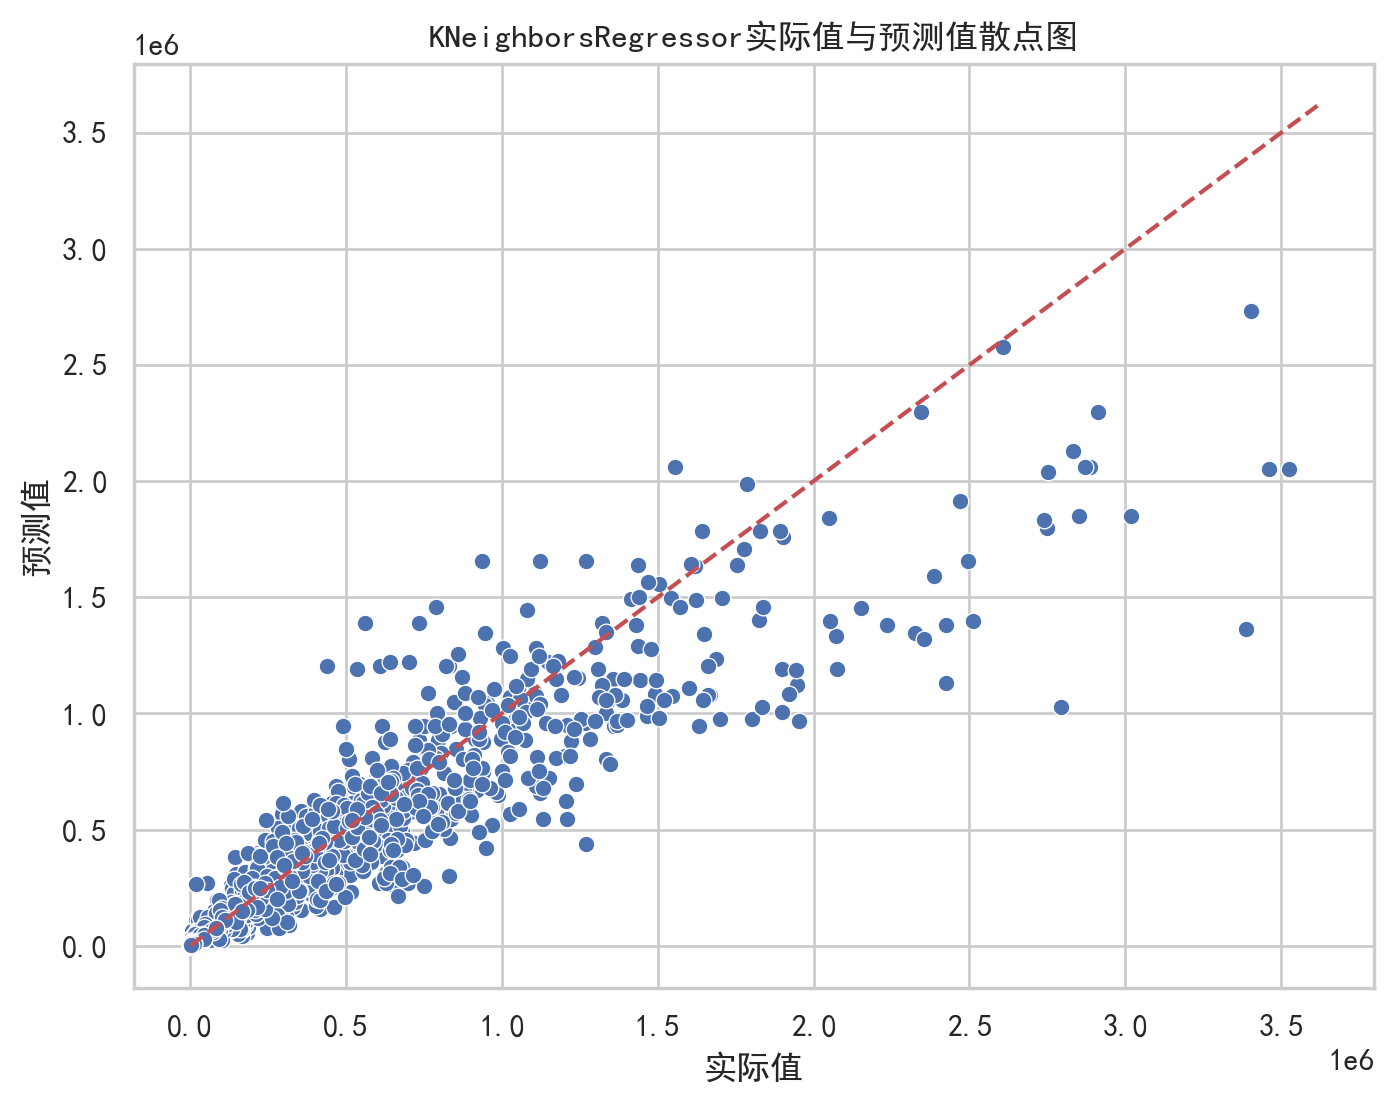

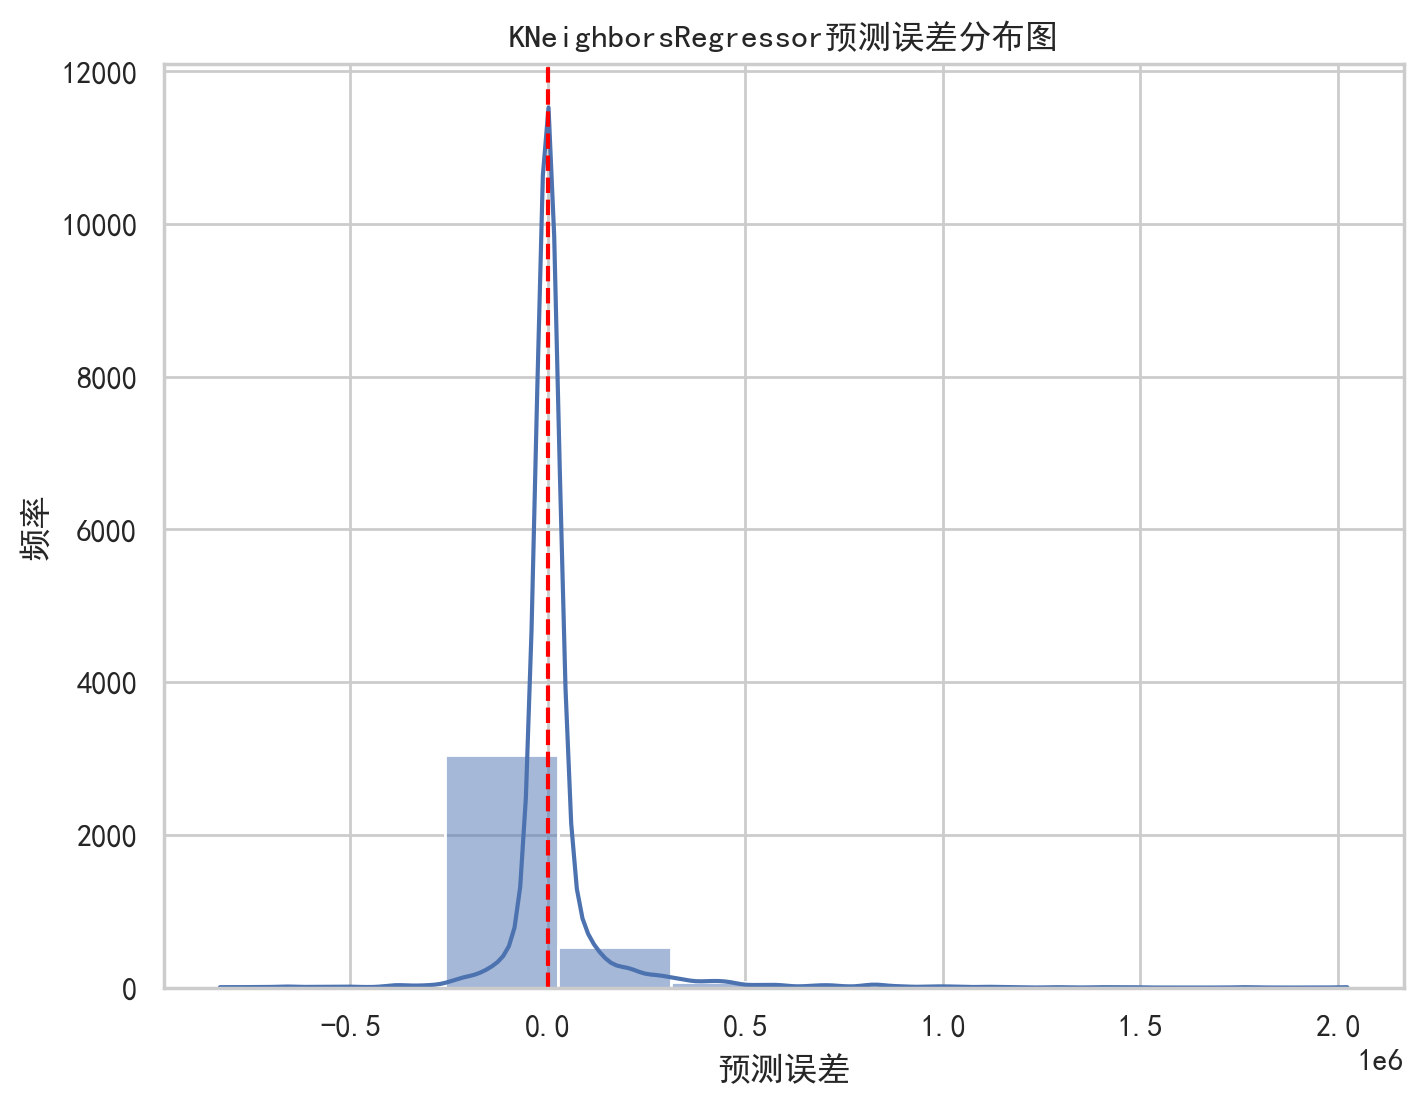

---start	XGBoost	----


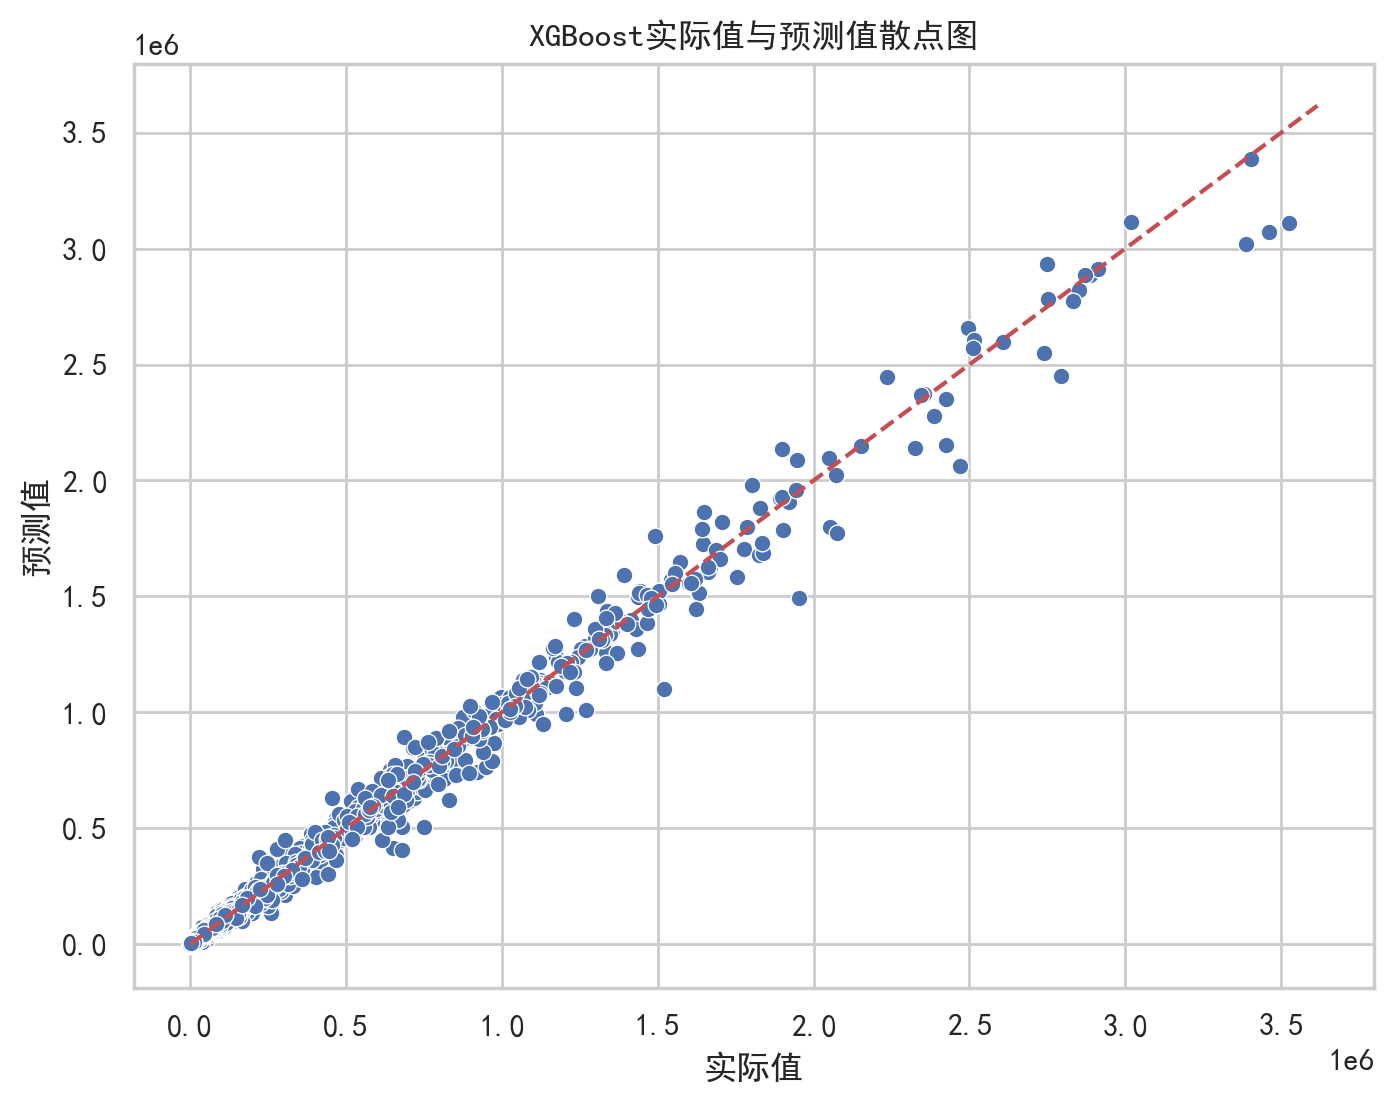

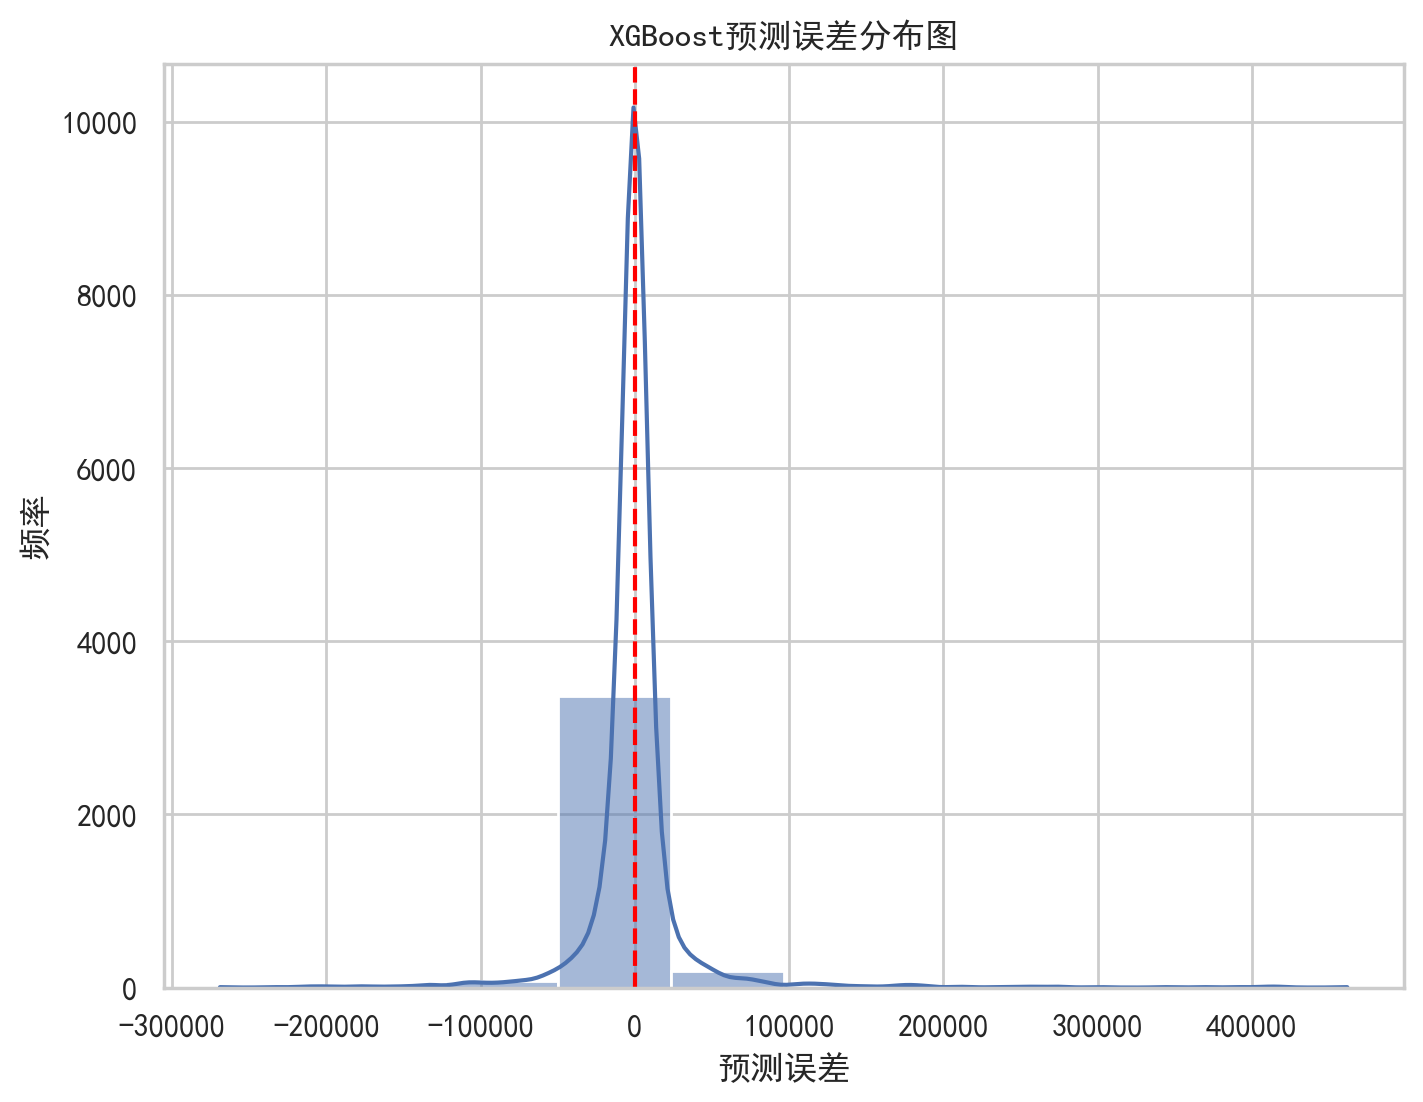

---start	RandomForest	----


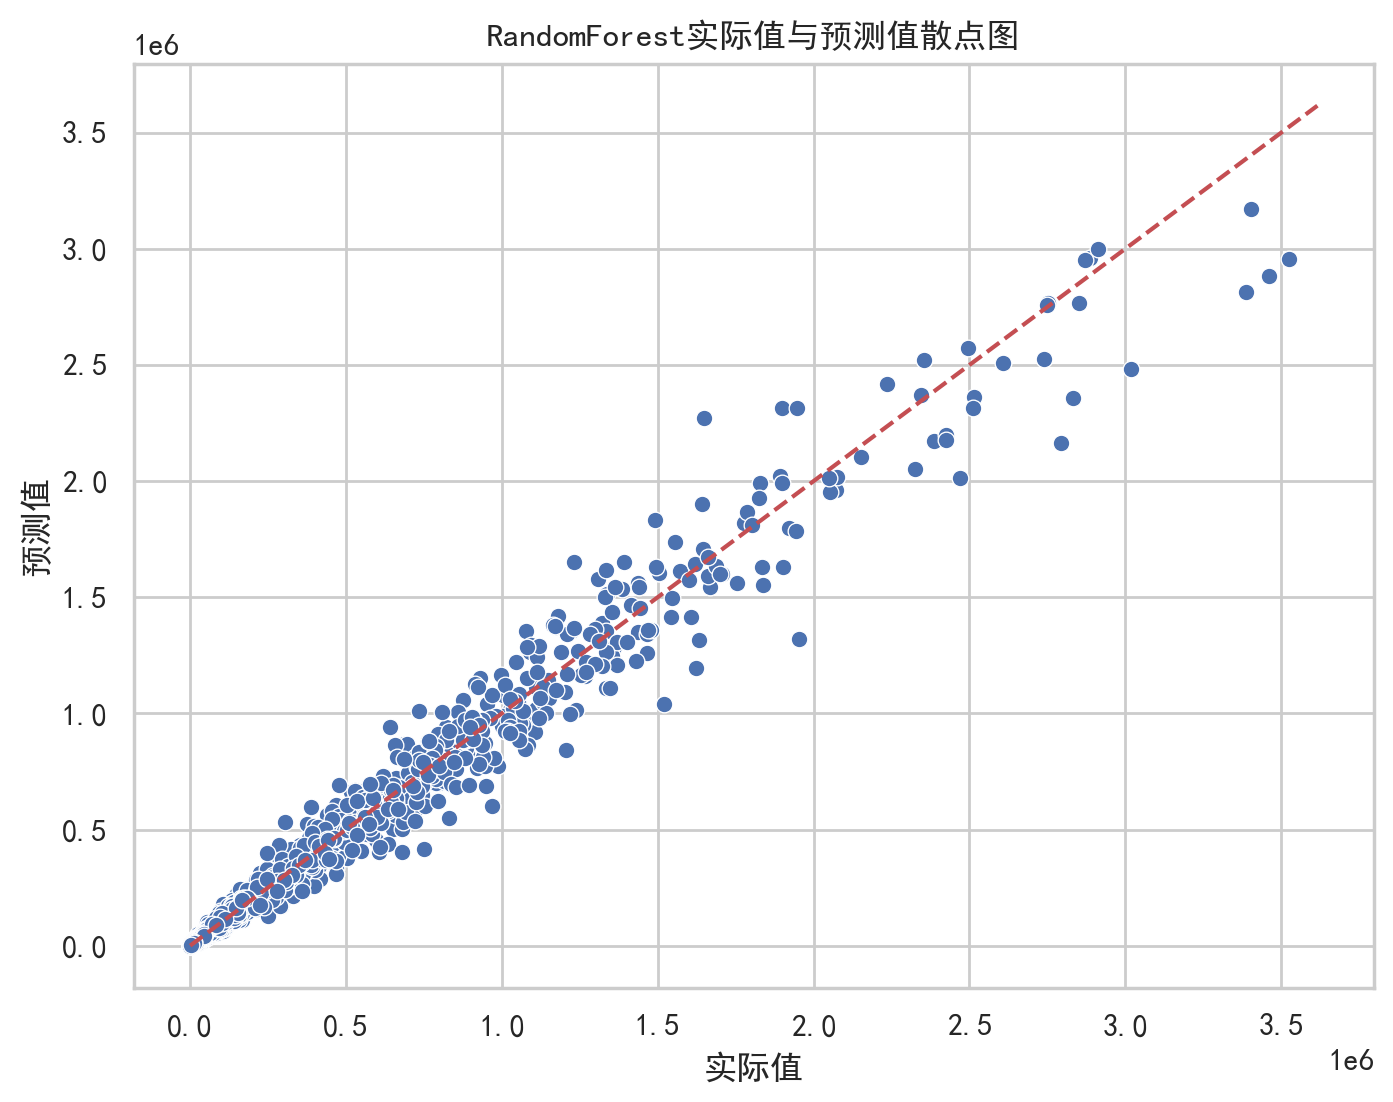

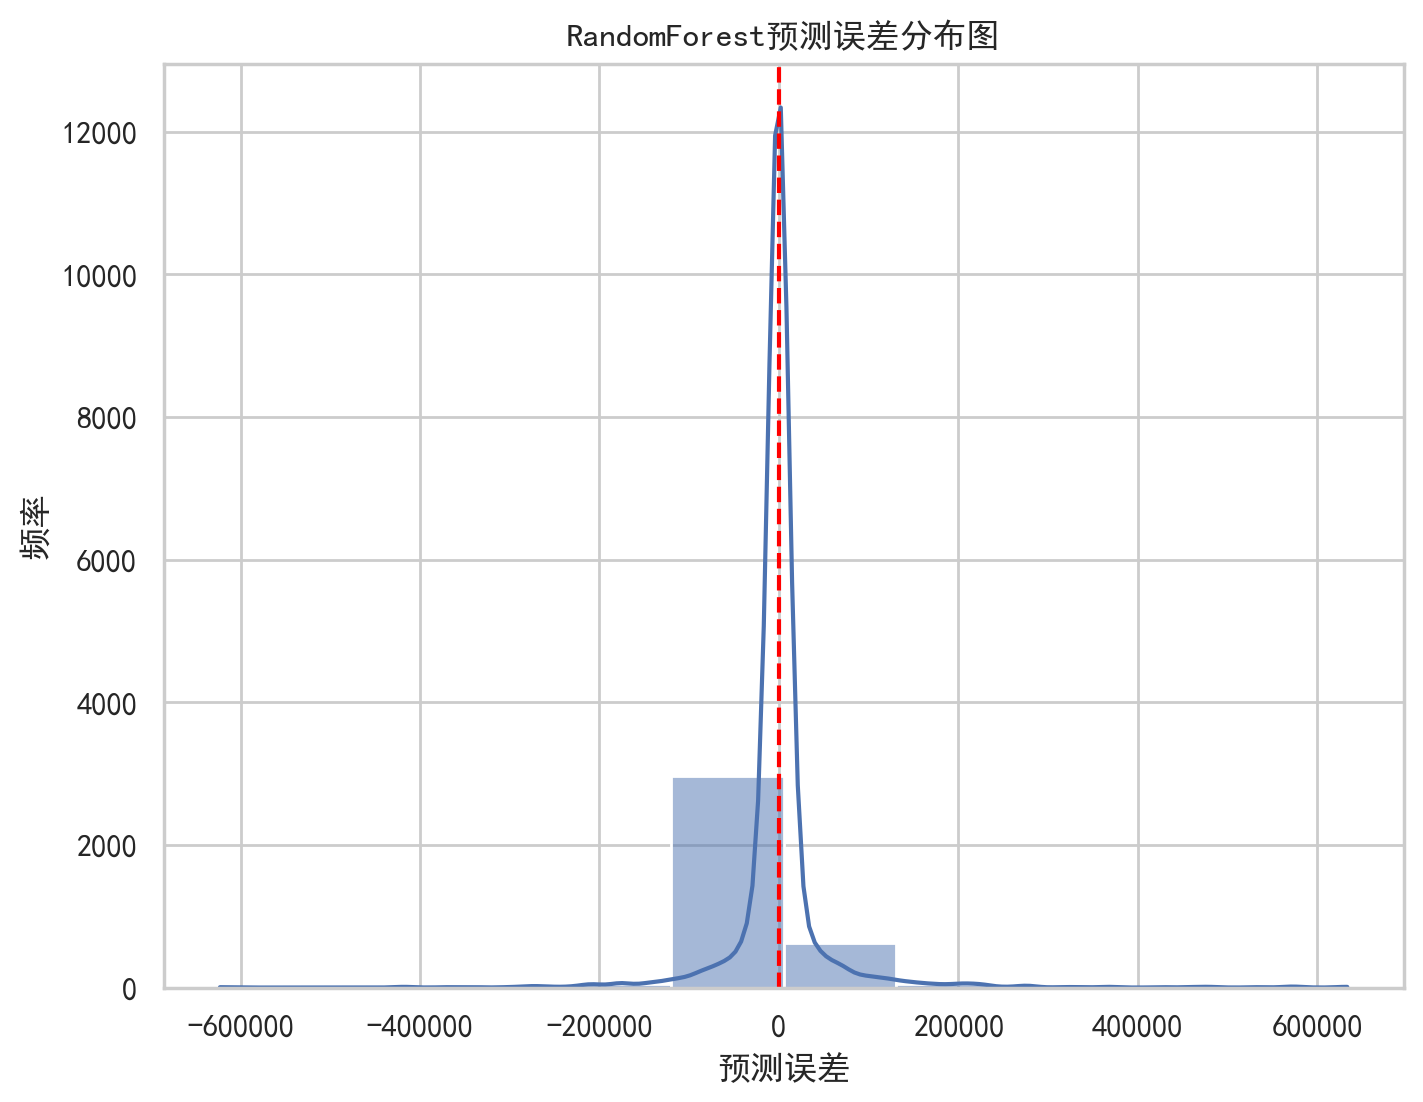

---start	GradientBoostingRegressor	----


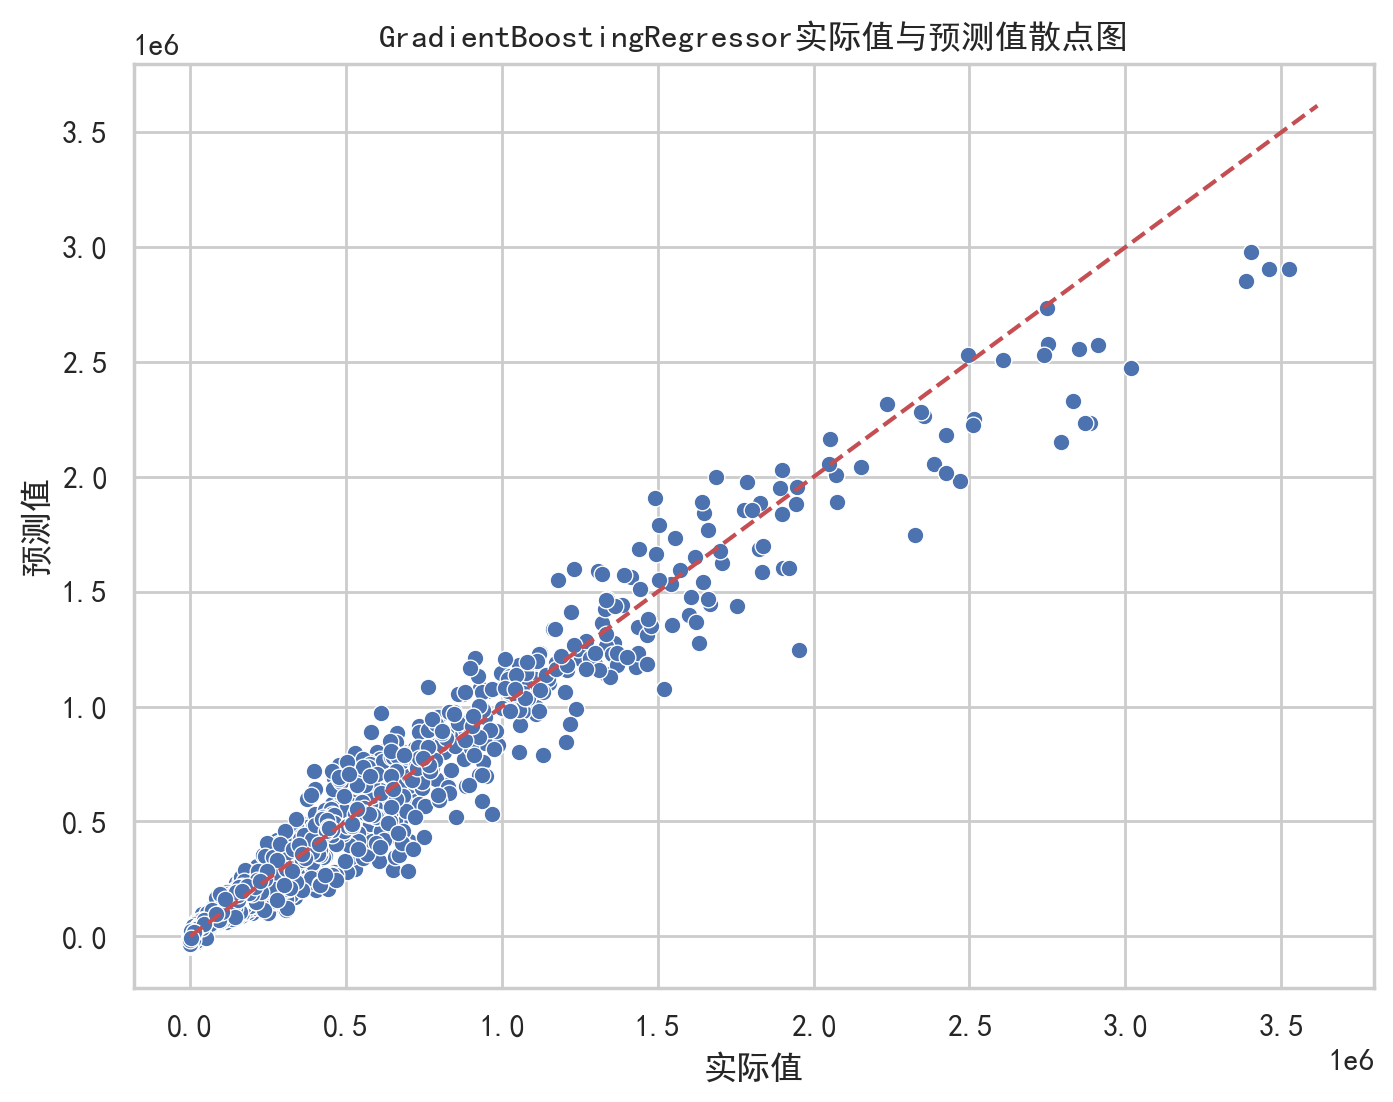

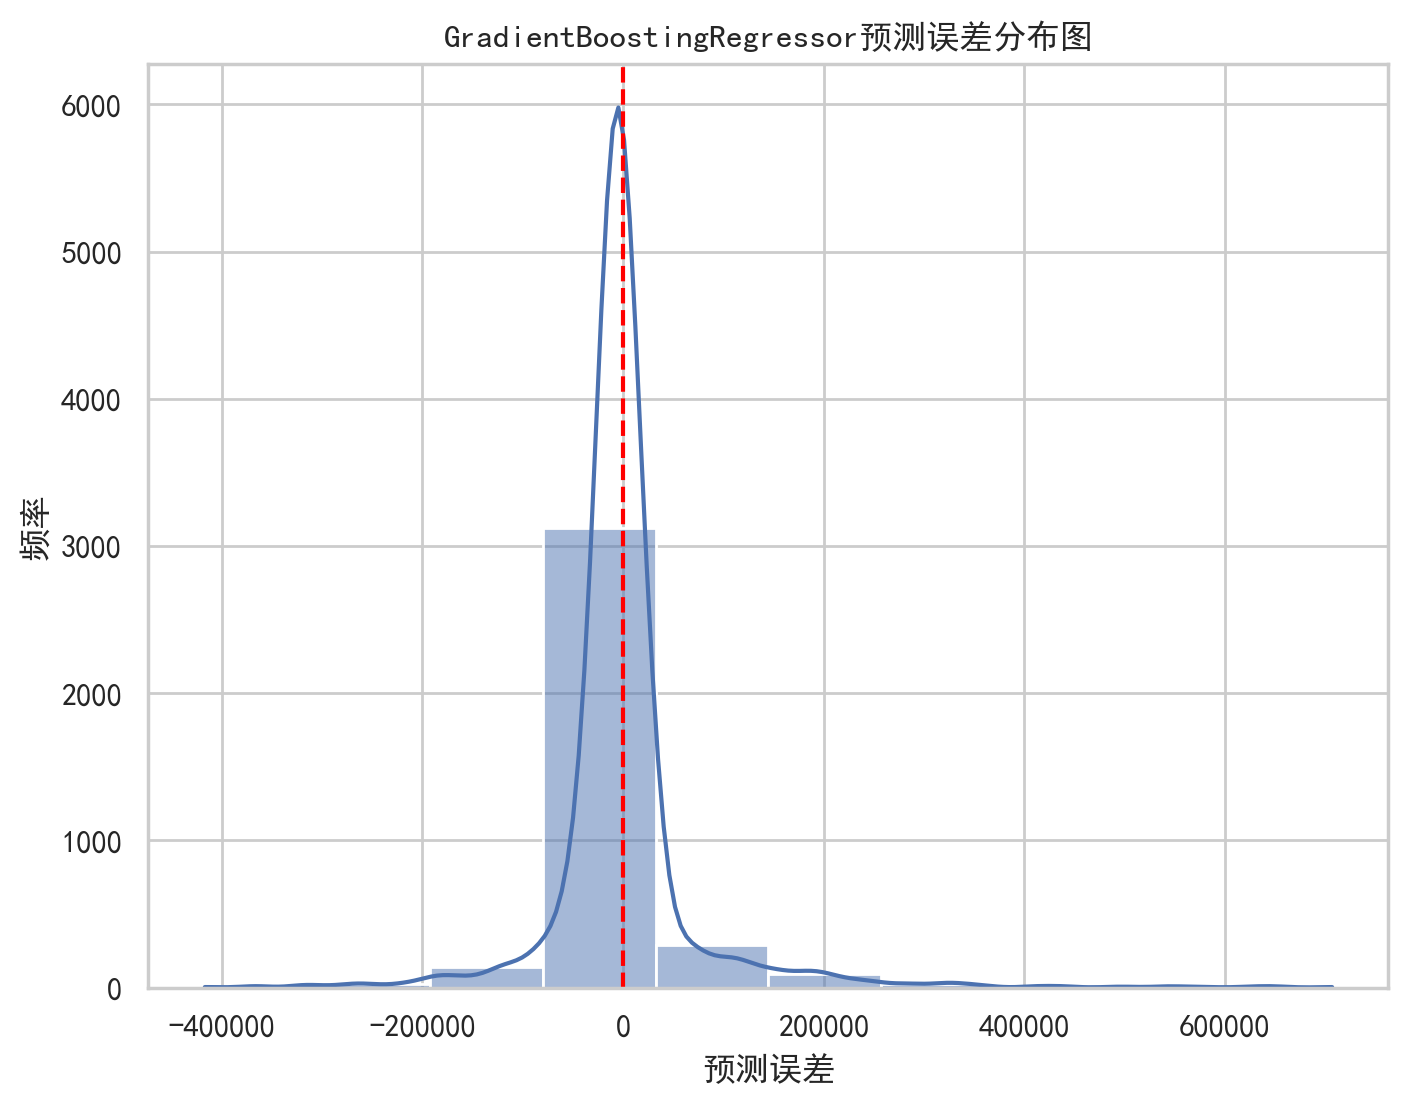

---start	Stacking	----


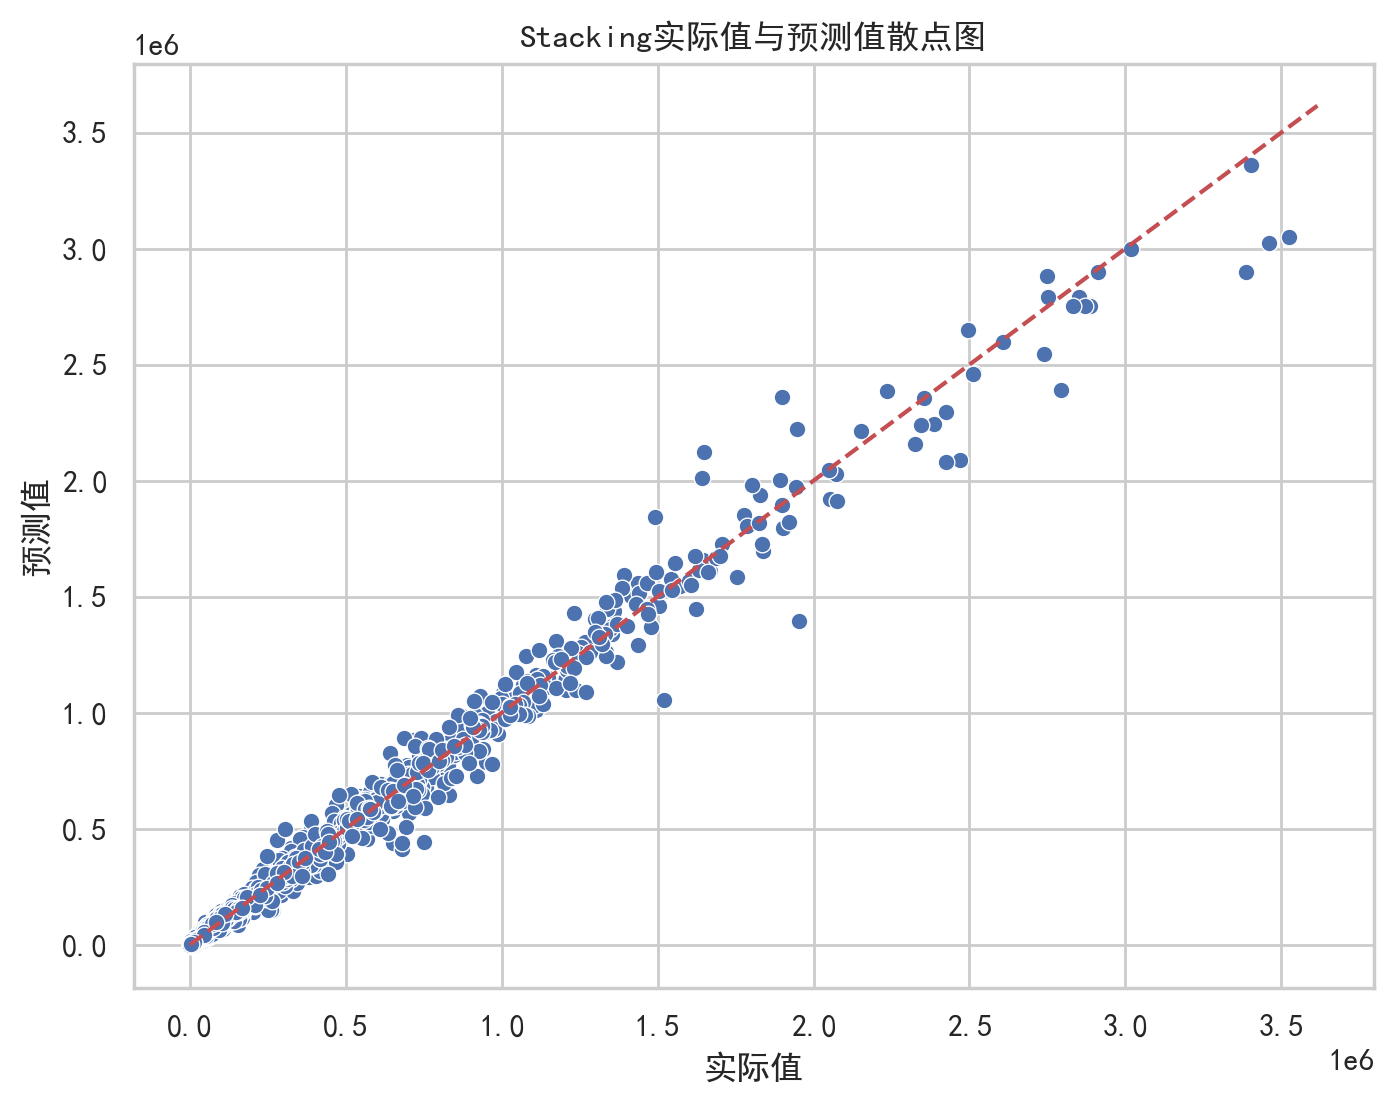

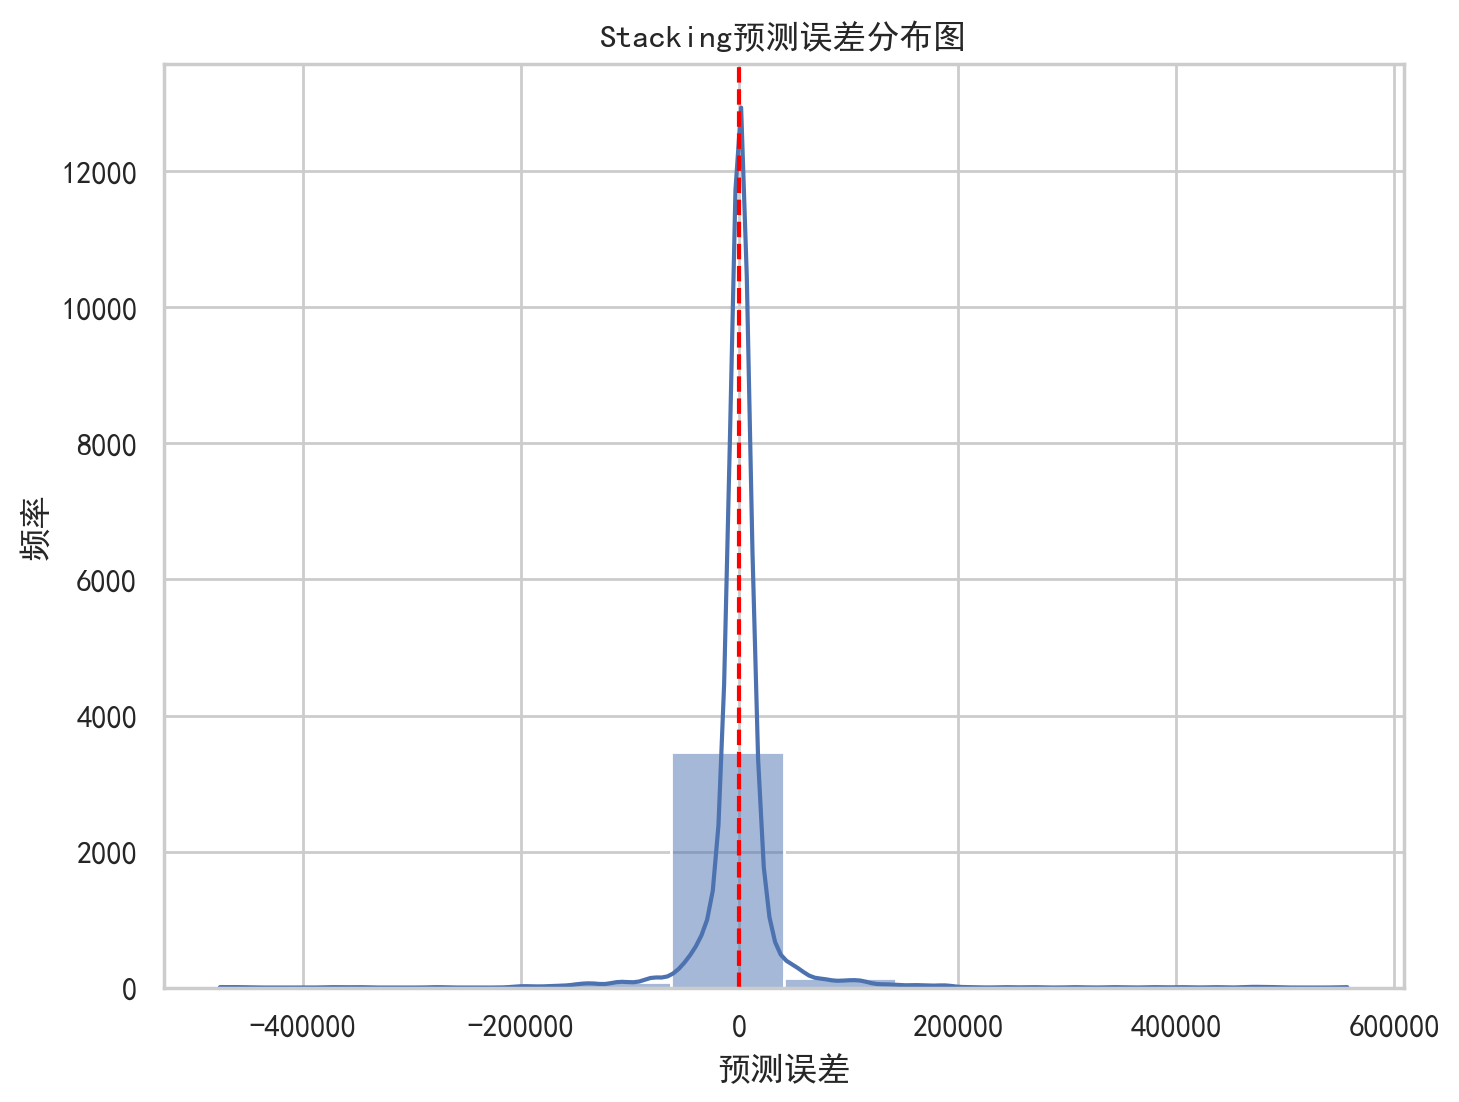

---start	VotingRegressor	----


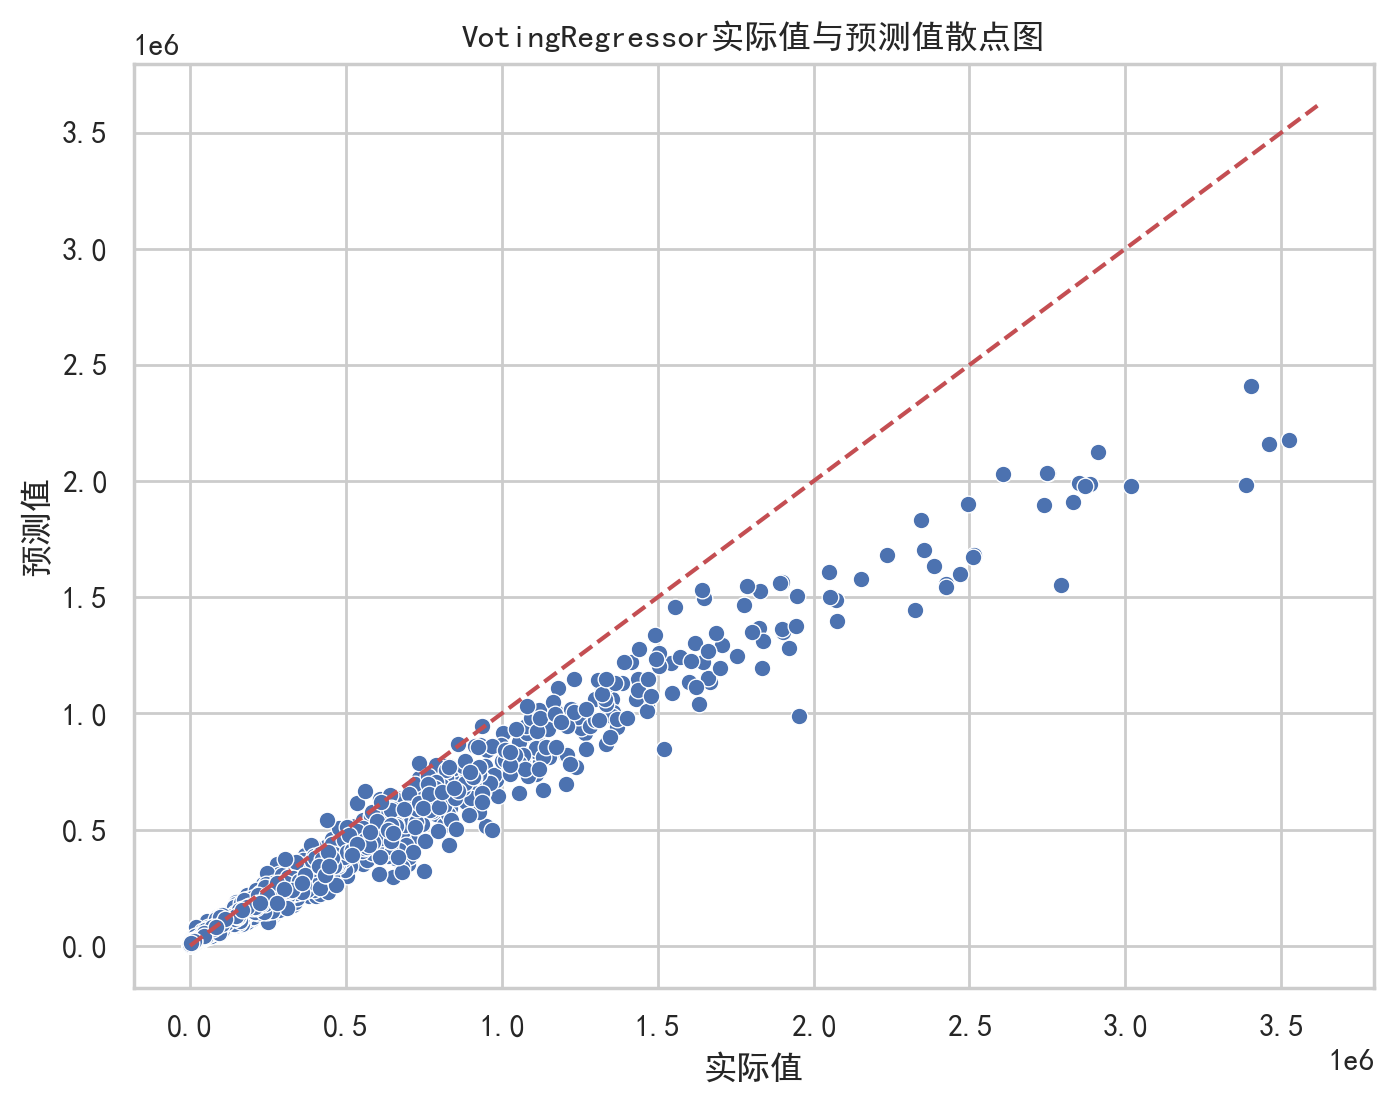

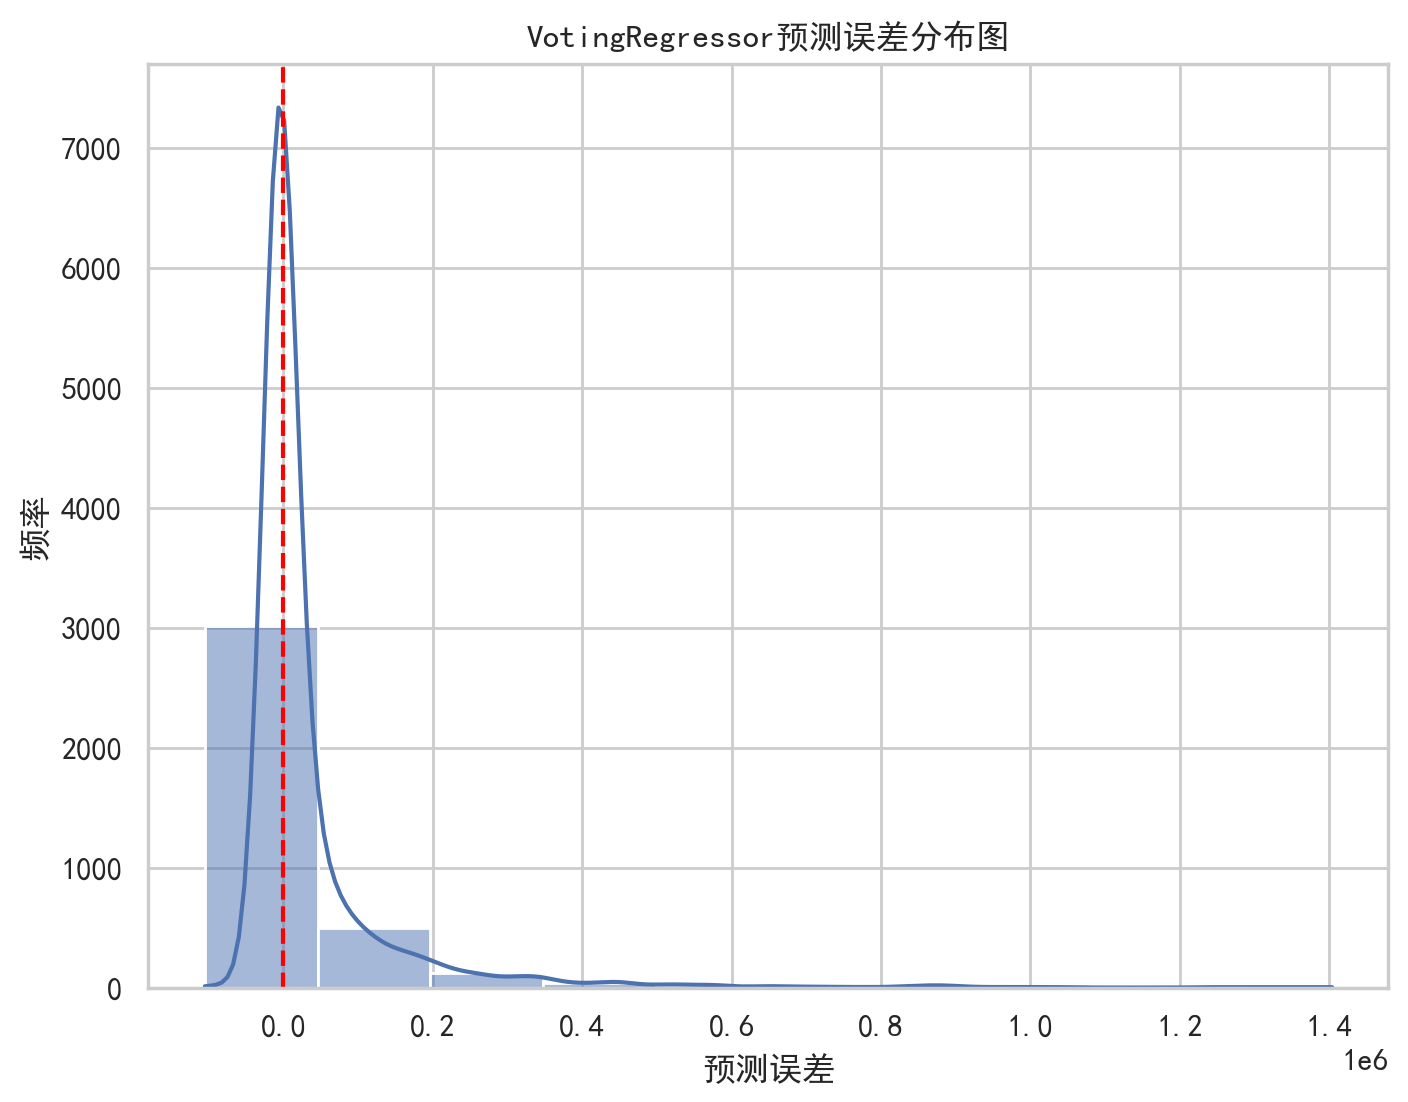

                                    MSE        R2 Explained Variance
KNeighborsRegressor         48676.90136  0.870933           0.873505
XGBoost                    13648.820649  0.991786            0.99179
RandomForest               20066.095809  0.979688           0.979696
GradientBoostingRegressor  35815.127279  0.965052           0.965059
Stacking                   15196.576474  0.989326            0.98933
VotingRegressor             44301.92075  0.906882           0.915103


In [83]:

names = ["KNeighborsRegressor", "XGBoost", "RandomForest", 
         "GradientBoostingRegressor", "Stacking",  "VotingRegressor"]

# 定义基学习器
estimators = [
    ('rf', RandomForestRegressor(n_estimators=174,
            max_depth=26,
            min_samples_split=8,
            min_samples_leaf=2)),
    ('xgb', XGBRegressor()),
    ('svr', SVR( C=0.0432,kernel='linear')),
    ('gdbt', GradientBoostingRegressor()),
    ('knn', KNeighborsRegressor(n_jobs=-1))
]

# 定义回归模型
classifiers = [
    KNeighborsRegressor(),             # 设置最小损失减少量
    XGBRegressor(n_estimators=300,        # 设置树的数量
    learning_rate=0.25,       # 设置学习率
    max_depth=5,             # 设置树的最大深度
    min_child_weight=1,      # 设置最小子节点权重
    subsample=1,           # 设置样本采样比例
    colsample_bytree=1,    # 设置特征采样比例
    gamma=0.1, ), 
    RandomForestRegressor(n_jobs=-1),
    GradientBoostingRegressor(),
    StackingRegressor(estimators=estimators, final_estimator=LinearRegression()),
     VotingRegressor(estimators=estimators)
]

# 创建 DataFrame 存储评估结果

regressor_df = pd.DataFrame(index=names, columns=['MSE', 'R2', 'Explained Variance'])
predict_map = {}

# 训练模型并评估
for name, clf in zip(names, classifiers):
    print("---start\t" + name + "\t----")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    predict_map[name] = y_pred
    MSE = mean_absolute_error(y_valid, y_pred)
    R2 = r2_score(y_valid, y_pred)
    explained_variance = explained_variance_score(y_valid, y_pred)
    regressor_df.loc[name, 'MSE'] = MSE
    regressor_df.loc[name, 'R2'] = R2
    regressor_df.loc[name, 'Explained Variance'] = explained_variance
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_valid, y=y_pred)
    plt.xlabel('实际值')
    plt.ylabel('预测值')
    plt.title(f'{name}实际值与预测值散点图')
    plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--')  # 绘制理想情况下的对角线
    plt.show()

    errors = y_valid - y_pred

    # 绘制误差分布图
    plt.figure(figsize=(8, 6))
    sns.histplot(errors, bins=10, kde=True)
    plt.xlabel('预测误差')
    plt.ylabel('频率')
    plt.title(f'{name}预测误差分布图')
    plt.axvline(0, color='red', linestyle='--')  # 绘制零误差线
    plt.show()

print(regressor_df)
    # 输出结果
    
    # 获取特征重要性
    # importances = model.feature_importances_
    # feature_names = X.columns

    # # 绘制特征重要性图
    # plt.figure(figsize=(8, 6))
    # sns.barplot(x=importances, y=feature_names)
    # plt.title('特征重要性')
    # plt.xlabel('重要性')
    # plt.show()



In [41]:
from sklearn.model_selection import RandomizedSearchCV
#随机森林随机搜索参数优化
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)

Best parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}


In [44]:
from sklearn.model_selection import RandomizedSearchCV
#XGBoost随机搜索参数优化
param_grid = {
    'n_estimators': [100, 200,300],
    'max_depth': [3, 5, 7,9],
    'learning_rate': [0.01, 0.1, 0.2,0.25],
    'subsample': [0.6,0.8, 1.0],
    'colsample_bytree': [0.8, 1.0,2.0],
    'min_depth': [1, 3, 5],  # 这里可以替换为 min_depth
    'gamma': [0, 0.1, 0.3, 0.5]  # 这里是 gamma 参数
}
model = XGBRegressor()
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=5)
random_search.fit(X_train, y_train)
print("Best parameters found: ", random_search.best_params_)

Best parameters found:  {'subsample': 1.0, 'n_estimators': 300, 'min_depth': 1, 'max_depth': 5, 'learning_rate': 0.25, 'gamma': 0.1, 'colsample_bytree': 1.0}


In [45]:
from sklearn.model_selection import RandomizedSearchCV
#GBDT随机搜索参数优化
param_grid = {
   'n_estimators': [100, 200,300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7,],
    'min_samples_split': [2, 5,8],
    'min_samples_leaf': [1, 2,3]
}
model = GradientBoostingRegressor()
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=5)
random_search.fit(X_train, y_train)
print("Best parameters found: ", random_search.best_params_)

Best parameters found:  {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.2}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
#KNN随机搜索参数优化
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],  # 仅在使用树算法时可用
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'p': [1, 2]  # 1 表示曼哈顿距离，2 表示欧几里得距离
}
model = KNeighborsRegressor()
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=5)
random_search.fit(X_train, y_train)
print("Best parameters found: ", random_search.best_params_)

In [ ]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint 
#VR网格搜索参数优化
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
model3 = KNeighborsRegressor()

# 创建投票回归器
voting_regressor = VotingRegressor(estimators=[
    ('lr', model1),
    ('dt', model2),
    ('knn', model3)
])

param_grid = {
    'weights': [(1, 1, 1), (1, 2, 1), (2, 1, 1), (1, 1, 2)],  # 不同的权重组合
    'estimators__dt__max_depth': [None, 5, 10],  # 决策树的最大深度
    'estimators__knn__n_neighbors': randint(1, 20),  # KNN 的邻居数量
    'estimators__knn__weights': ['uniform', 'distance'],  # KNN 的权重选项
    'estimators__knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # KNN 的算法选项
    'estimators__knn__leaf_size': randint(20, 50)  # KNN 的叶子大小
}

random_search = RandomizedSearchCV(
    estimator=voting_regressor,
    param_distributions=param_grid,
    n_iter=20,  # 随机搜索的组合数量
    cv=5,  # 交叉验证的折数
    random_state=42
)

# 训练模型
random_search.fit(X_train, y_train)

# 输出最佳参数
print("Best parameters found: ", random_search.best_params_)

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
#Stacking贝叶斯优化
def objective(trial):
    # 超参数选择
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 5, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)

    # SVM 超参数
    C = trial.suggest_loguniform('C', 1e-5, 1e2)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    
    # 定义基学习器
    base_learners = [
        ('rf', RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)),
        ('svr', SVR())
    ]
    
    # 定义二级学习器
    meta_learner = LinearRegression()
    
    # 定义 Stacking 模型
    model = StackingRegressor(estimators=base_learners, final_estimator=meta_learner)
    
    # 交叉验证评估
    score = cross_val_score(model, X_train, y_train, cv=5)
    
    return score.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# 输出最佳参数
print("Best parameters: ", study.best_params)

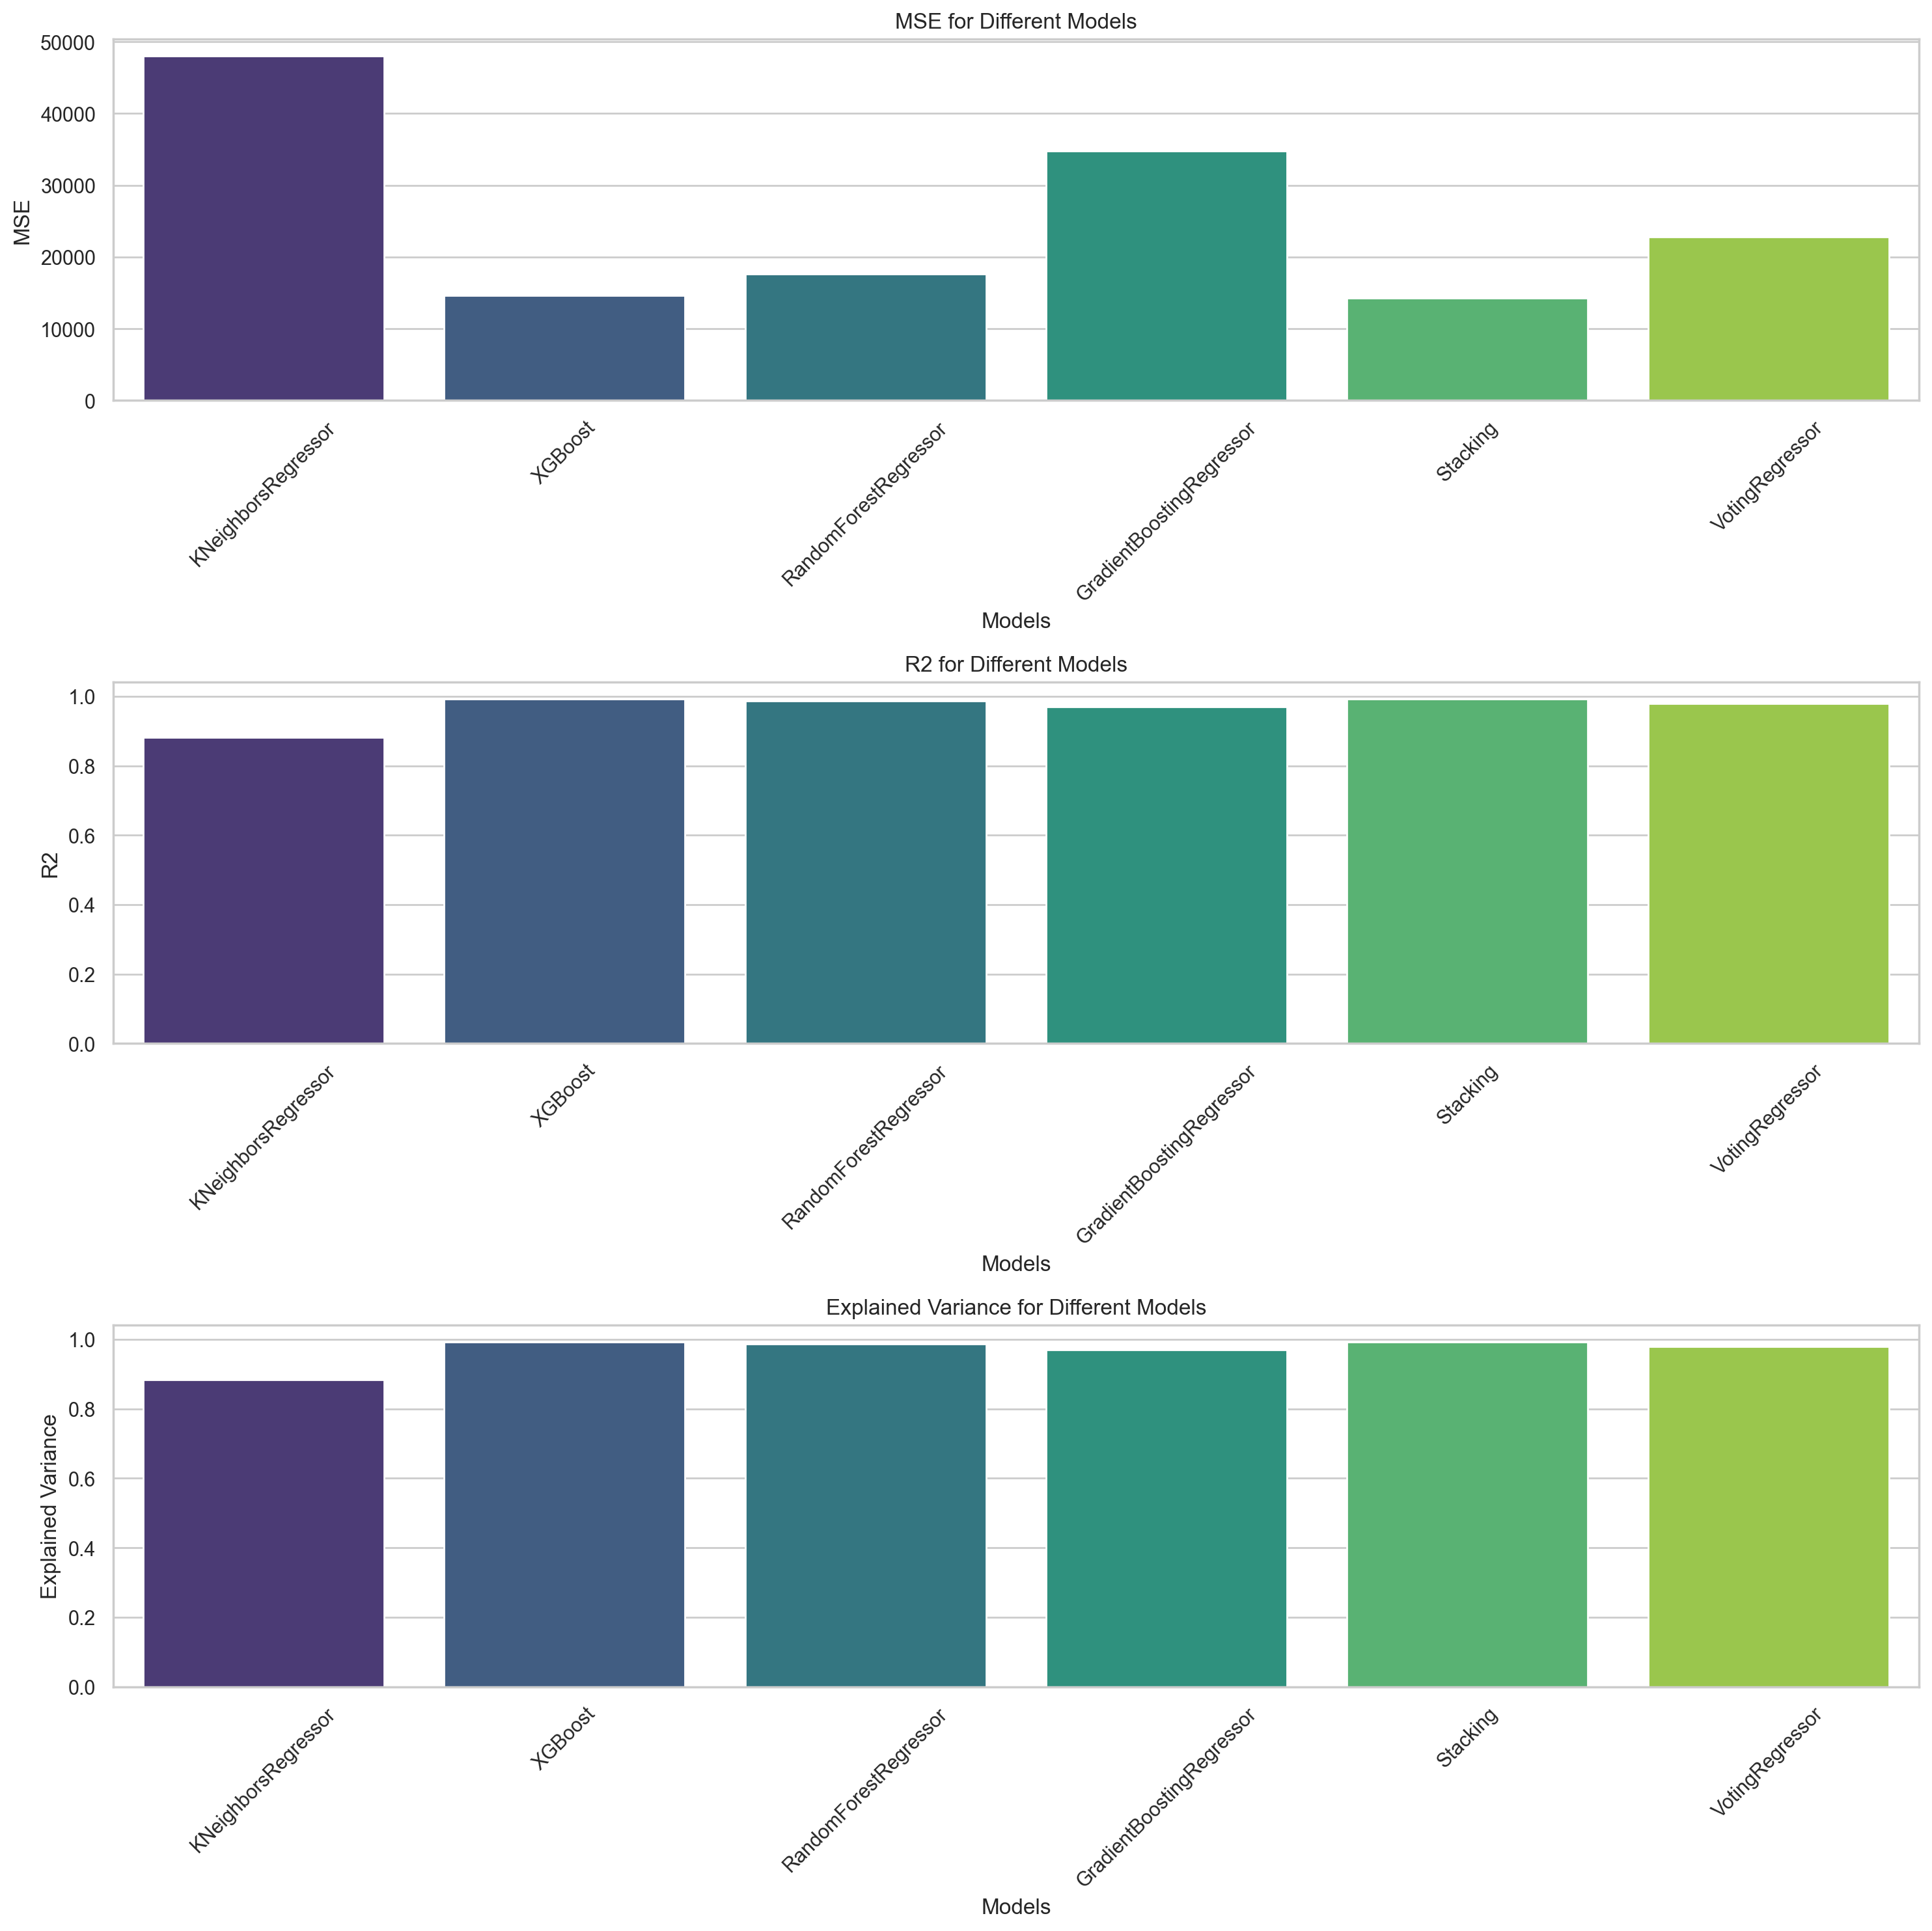

In [37]:
regressor_df.reset_index(inplace=True)
regressor_df.rename(columns={'index': 'Model'}, inplace=True)

# 设置图形风格
sns.set(style="whitegrid")

# 绘制每个指标的柱状图
metrics = ['MSE', 'R2', 'Explained Variance']
n_metrics = len(metrics)

plt.figure(figsize=(15, 5 * n_metrics))

for i, metric in enumerate(metrics):
    plt.subplot(n_metrics, 1, i + 1)
    sns.barplot(data=regressor_df, x='Model', y=metric, palette='viridis')
    
    # 添加标题和标签
    plt.title(f'{metric} for Different Models')
    plt.xlabel('Models')
    plt.ylabel(metric)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [90]:
X_train

array([[0.38755728, 0.32500273, 0.52052403, 0.34619617, 0.39810971,
        0.29936265],
       [0.61788847, 0.50560471, 0.52984703, 0.35851317, 0.2886494 ,
        0.48161278],
       [0.32492187, 0.33507328, 0.44582321, 0.27566191, 0.49842818,
        0.21938115],
       ...,
       [0.59288283, 0.39150977, 0.68055426, 0.37615845, 0.33667329,
        0.51596407],
       [0.56243313, 0.6998763 , 0.62456546, 0.22147072, 0.45341405,
        0.38736246],
       [0.46706656, 0.50587656, 0.3761596 , 0.14261629, 0.60202601,
        0.61506208]])

In [81]:
df2_features = test
# 创建一个新的 DataFrame 用于存储预测结果
predictions_df = pd.DataFrame()
# 处理每个模型
for name, clf in zip(names, classifiers):
    print("---start\t" + name + "\t----")
    clf.fit(X_train, y_train)
    # 使用模型进行预测
    df2_predictions = clf.predict(df2_features)
    # 输出预测结果
    print(f'{name}模型的预测结果：')
    # 将预测结果添加到 DataFrame 中
    predictions_df[name] = df2_predictions


---start	KNeighborsRegressor	----
KNeighborsRegressor模型的预测结果：
---start	XGBoost	----
XGBoost模型的预测结果：
---start	RandomForest	----
RandomForest模型的预测结果：
---start	GradientBoostingRegressor	----
GradientBoostingRegressor模型的预测结果：
---start	Stacking	----
Stacking模型的预测结果：
---start	VotingRegressor	----
VotingRegressor模型的预测结果：


In [82]:
predictions_df.to_excel('model_predictions_3.xlsx', index=False)

print("预测结果已保存为 'model_predictions_3.xlsx'")

预测结果已保存为 'model_predictions_3.xlsx'


In [116]:
#实现反归一化
denormalized_data = RandomForest_predictions * (560274.1581 - 505.0898) + predict_min


denormalized_data
# 创建 MinMaxScaler 实例并进行拟合
# scaler = MinMaxScaler()
# normalized_data = scaler.fit_transform(data)

# print("Normalized Data:", normalized_data)

# 反归一化
# denormalized_data = scaler.inverse_transform(normalized_data)

array([  3751.52816414,   4872.94393367,   6807.11765351,   7146.69330083,
        11678.79116222,   3371.43506665,    759.12124656,    622.44848289,
        61963.94711937,   1536.35292005,   3576.24031529,  35652.65905364,
         1186.26591836,    876.12504528,   5198.38812059,    515.95911981,
        22976.94003904,  50131.64790093,    665.66570133,  85984.35072422,
          576.72191883,   8723.89943098,  60895.18674587,   1467.44703876,
         3780.86436902,   3761.79996724,  30597.55673111,  51275.9037431 ,
          888.74582675, 106868.29588983,   1453.17032443,    701.81894761,
         6829.06743791,   9891.56842797,   1015.0581273 ,   1239.81012583,
         6850.45786166,  16094.36543724,  24858.89479192,  73269.45836557,
        15887.10872483, 128468.94764087,  95762.80328732, 102923.98637223,
          873.47617233,   7451.78851359,   4649.91927047,  65108.94063837,
         2284.55327922,  13429.0864785 ,   1272.93640368,  13153.82666468,
         1733.21364283,  

In [14]:
import math

In [15]:
def calculate(x_1:int,x_2:int, y_1:int,y_2:int,z_1:int,z_2:int):
    
    x_cnt = x_1+x_2
    y_cnt = y_1+y_2
    z_cnt = z_1+z_2
    sum = x_cnt + y_cnt +z_cnt

    if  x_1 and  x_2:
        I_x = -x_1/x_cnt * math.log2(x_1/x_cnt) - x_2/x_cnt * math.log2(x_2/x_cnt)
    else:
        I_x = 0

    if  y_1 and  y_2:
        I_y = -y_1/y_cnt * math.log2(y_1/y_cnt) - y_2/y_cnt * math.log2(y_2/y_cnt)
    else:
        I_y = 0
    
    if  z_1 and  z_2:
        I_z = -z_1/z_cnt * math.log2(z_1/z_cnt) - z_2/z_cnt * math.log2(z_2/z_cnt)
    else:
        I_z = 0

    E = x_cnt/sum * I_x + y_cnt/sum * I_y + z_cnt/sum * I_z

    print("x_E =",I_x,"y_E=",I_y,"z_E=",I_z)
    print("E=",E,"\n")
    return E
def calculate2(x_1:int,x_2:int):
    x_cnt = x_1+x_2
    return -x_1/x_cnt * math.log2(x_1/x_cnt) - x_2/x_cnt * math.log2(x_2/x_cnt)

In [24]:
calculate2(256,48)

0.7355085815538398

In [13]:
x=120+80+120
x


420

In [21]:
prime = calculate(370,400,0,0,0,0)
class_1 = calculate(50,200,140,80,180,120)
class_2 = calculate(50,80,140,0,180,0)
class_3 = calculate(230,80,140,320,0,0) 
class_4 = calculate(180,400,190,0,0,0) 

gain_1 = prime - class_1

gain_2 = prime - class_2

gain_3 = prime - class_3

gain_4 = prime - class_4

print(gain_1,gain_2,gain_3,gain_4)

x_E = 0.9989047442823606 y_E= 0 z_E= 0
E= 0.9989047442823606 

x_E = 0.7219280948873623 y_E= 0.9456603046006402 z_E= 0.9709505944546686
E= 0.8828733364550416 

x_E = 0.961236604722876 y_E= 0 z_E= 0
E= 0.2776905746977197 

x_E = 0.8238116333123173 y_E= 0.8865408928220899 z_E= 0
E= 0.861286255876597 

x_E = 0.8935711016541907 y_E= 0 z_E= 0
E= 0.6730795311161437 

0.11603140782731902 0.721214169584641 0.13761848840576363 0.32582521316621693
